In [5]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
# Source: https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

# A plot for my girlfriend

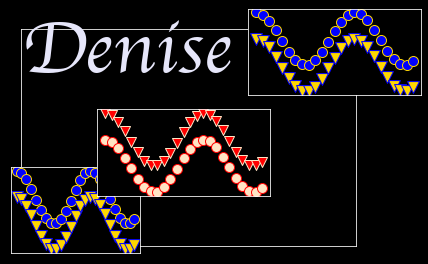

In [24]:
# Set style
plt.style.use('dark_background')

fig = plt.figure()
# Create axes subplots
ax1 = plt.axes() # standard axes
ax2 = plt.axes([0.65, 0.65, 0.4, 0.3])
ax3 = plt.axes([0.1, 0.1, 0.3, 0.3])
ax4 = plt.axes([0.3, 0.3, 0.4, 0.3])

# Generate data
x = np.linspace(0, 10, 25)
y = np.cos(x)

# Hide ticks and plot scatters
ax1.axes.xaxis.set_ticks([]) # Make ticks invisible
ax1.axes.yaxis.set_ticks([])
ax1.text(0, 0.8, 'Denise', fontsize='75', 
         family='cursive', c='lavender')

ax2.axes.xaxis.set_ticks([])
ax2.axes.yaxis.set_ticks([])
ax2.scatter(x, y, color='b', s=100, edgecolor='gold') # Scatter with customizations
ax2.scatter(x, y-1, color='gold', s=140, 
            edgecolor='b', marker='v')

ax3.axes.xaxis.set_ticks([])
ax3.axes.yaxis.set_ticks([])
ax3.scatter(x, y, color='b', s=100, edgecolor='gold')
ax3.scatter(x, y-1, color='gold', 
            s=140, edgecolor='b', marker='v')

ax4.axes.xaxis.set_ticks([])
ax4.axes.yaxis.set_ticks([])
ax4.scatter(x, y, c='red', s=100, 
            edgecolor='bisque', marker='v')
ax4.scatter(x, y-1, c='bisque', s=100, edgecolor='red');

# Taking a look at drug overdose dataset from Kaggle. The data is from overdose deaths from 2012-2018 in Connecticut, USA.
## I am interested in looking into some questions I have about the data such as:
- Are the overdose deaths increasing from 2012 to 2018?
- What age ranges seem to be struggling with overdoses? Is it younger people in their twenties or maybe middle-aged adults in their thirties and forties?
- I am very curious to know how many of the deaths involved a combination of heroine, fentanyl, and cocaine.
- Is there a particular race that is more prone to accidental drug overdose death?

In [6]:
# Import drug overdose dataset from kaggle
# https://www.kaggle.com/ruchi798/drug-overdose-deaths
drugs = pd.read_csv('drug_deaths.csv')

In [10]:
drugs.shape

(5105, 42)

In [11]:
drugs.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,...,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,...,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,...,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [9]:
drugs.columns

Index(['Unnamed: 0', 'ID', 'Date', 'DateType', 'Age', 'Sex', 'Race',
       'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity',
       'DeathCounty', 'Location', 'LocationifOther', 'DescriptionofInjury',
       'InjuryPlace', 'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD',
       'OtherSignifican', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
       'Other', 'OpiateNOS', 'AnyOpioid', 'MannerofDeath', 'DeathCityGeo',
       'ResidenceCityGeo', 'InjuryCityGeo'],
      dtype='object')

# How many men versus women are dying from the overdoses in the dataset?

In [27]:
# Examine how many women versus men died from overdoses
display("drugs.groupby('Sex').count()")

,Unnamed: 0,ID,Date,DateType,Age,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
Sex,,,,,,,,,,,,,,,,,,,,,
Female,1325,1325,1325,1325,1325,1320,1281,1100,886,1325,...,1325,1325,1325,157,1325,1325,1325,1325,1302,1309
Male,3773,3773,3772,3772,3773,3768,3647,3204,2666,3771,...,3773,3773,3773,278,3773,3773,3764,3773,3703,3711
Unknown,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1


We can see that significantly more men died from overdoses than women. Lets see the percentages.

In [31]:
fraction_male_deaths = (3773 / 5098)
fraction_female_deaths = 1 - fraction_male_deaths
percent_male_deaths = np.round(fraction_male_deaths * 100, 2)
percent_female_deaths = np.round(fraction_female_deaths * 100, 2)
print("Overdose Percentages: Men Versus Women")
print(f"Men: {percent_male_deaths}%")
print(f"Women: {percent_female_deaths}%")


Overdose Percentages: Men Versus Women
Men: 74.01%
Women: 25.99%


# Distribution of Deaths by Age

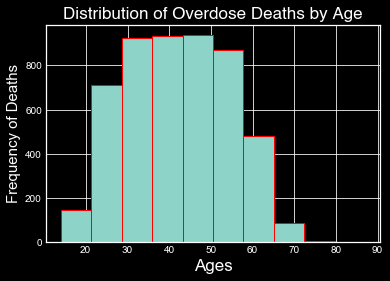

In [45]:
plt.style.use('dark_background')
drugs.Age.hist(edgecolor='r')
plt.title('Distribution of Overdose Deaths by Age',
          fontsize=17, family='Helvetica')
plt.ylabel('Frequency of Deaths', fontsize=15)
plt.xlabel('Ages', fontsize=17);

After looking at the distribution visually with a histogram, we can see that the highest number of overdoses is in the age span of roughly 30 years old to 50 years old.

# Requirement 4:
- I do not deserve a good grade for this assignment. I would say C at best. I am going to keep working on this for fun but I did not put enough time into it before the deadline. I am very excited after taking the course and having learned so many new cool things. 

# Requirement 5:
- This was not a good experience for me but it is my own fault. I have learned a lot over the summer about staying focused and knowing my limits. I was trying to do too much between work, school, and other life responsibilities. I am still grateful I took this course and excited for my future. I felt like I understood a lot of what is happening in the textbook but I need to practice working with datasets and developing my own questions, insights, and projects!